<a href="https://colab.research.google.com/github/sufairahmed/ML_IBM_COURSERA/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Polynomial Regression</center></h1>

<h4>Importing the Libraries</h4>

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
%matplotlib inline

#### Importing dataset

In [101]:
dataset = pd.read_csv('FuelConsumptionCo2.csv')
dataset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Data Exploration

In [102]:
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


####Select Some Feature to Explore more

In [103]:
selected_data = dataset[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
selected_data.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


#### Plot each of the selected Feature

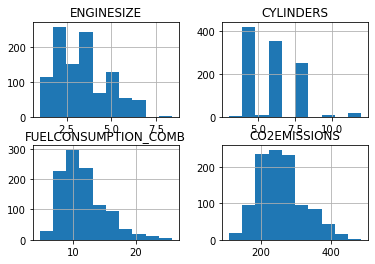

In [104]:
selected_data_viz = selected_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
selected_data_viz.hist()
plt.show()

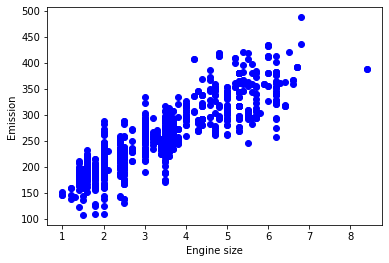

In [105]:
plt.scatter(selected_data.ENGINESIZE, selected_data.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

####Creating Training and Test set

In [106]:
msk = np.random.rand(len(dataset)) <0.8
train = selected_data[msk]
test = selected_data[~msk]

##Training Polynomial Regression

In [107]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly_reg = PolynomialFeatures(degree = 2)
train_x_poly = poly_reg.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

####We can use Linear Regression to solve this problem

In [108]:
lin_reg = linear_model.LinearRegression()
train_y = lin_reg.fit(train_x_poly, train_y)
#the coeffinients
print('coeffinients: ',lin_reg.coef_)
print('Intercept: ',lin_reg.intercept_)


coeffinients:  [[ 0.         49.44036462 -1.40161672]]
Intercept:  [108.98369901]


####Visualising polynomial regression

Text(0, 0.5, 'Emission')

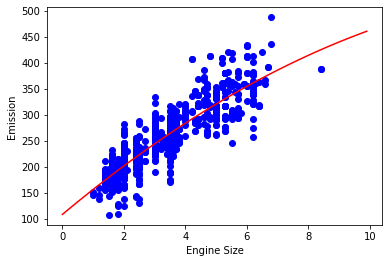

In [109]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color='blue')
X = np.arange(0.0, 10.0, 0.1)
y = lin_reg.intercept_[0]+ lin_reg.coef_[0][1]*X+ lin_reg.coef_[0][2]*np.power(X,2)
plt.plot(X,y,'-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")


In [112]:
from sklearn.metrics import r2_score

test_x_poly = poly_reg.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.01
Residual sum of squares (MSE): 903.27
R2-score: 0.73
